In [ ]:
from keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet
from keras.datasets import cifar10
from keras.optimizers import SGD
from keras import utils
from keras import layers
from keras.models import load_model

# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# convert pixels values to range [0,1]
x_train = x_train/255
x_test = x_test/255

# convert labels to one-hot encodings
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)


# set parameters
alpha = 0.25
depth = 4
batch_size = 128
n_epochs = 200

# create model
input_tensor = layers.Input(shape = x_train.shape[1:])
model = MobileNet(input_shape=None, alpha=alpha, depth_multiplier=depth, dropout=0.3,
                  include_top=True, weights=None, input_tensor=input_tensor, pooling=None, classes=10)

# data augmentation
datagen = ImageDataGenerator(
        rotation_range=0.3,
        width_shift_range=0.3,
        height_shift_range=0.3)

datagen.fit(x_train)

# create callbacks
callbacks = []
callbacks.append(ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True))
callbacks.append(CSVLogger('training_log.csv', separator=',', append=False))
callbacks.append(ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=10, min_lr=0.0000001))
callbacks.append(EarlyStopping(monitor='val_accuracy', patience=15))

# compile model
model.compile(loss='categorical_crossentropy', optimizer=SGD(momentum=0.9), metrics=['accuracy'])

# create fit function
history = model.fit_generator(
              datagen.flow(x_train, y_train, batch_size=batch_size),
              steps_per_epoch=len(x_train) / 128,
              epochs=n_epochs,
              verbose=2,
              callbacks=callbacks,
              validation_data=(x_test, y_test))


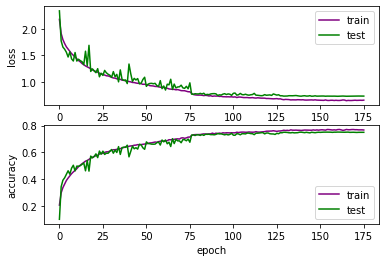

In [12]:
from matplotlib import pyplot as plt
import numpy as np
def save_plot(training_history, num_epochs):
    # saves training progress logs in plots
    # summarize and save loss plot
    plt.subplot(211)
    plt.plot(training_history.history['loss'], color='purple', label='train')
    plt.plot(training_history.history['val_loss'], color='green', label='test')
    plt.legend(loc="upper right")
    plt.ylabel('loss')
    # summarize and save accuracy plot
    plt.subplot(212)
    plt.plot(training_history.history['accuracy'], color='purple', label='train')
    plt.plot(training_history.history['val_accuracy'], color='green', label='test')
    plt.legend(loc="lower right")
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.show()
    plt.savefig('plot.png')
    plt.close()

save_plot(history, n_epochs)

In [15]:
from keras.models import load_model
# evaluate best model predictions
best_model = load_model('model.h5')
score = best_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', (score[1]))

Test loss: 0.7270761739730836
Test accuracy: 0.7509999871253967
